# Практика

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
cosine_rv = sts.cosine()
sample = cosine_rv.rvs(100)
sample

array([ 0.82637244,  1.27095005,  0.62751283, -0.04750466, -0.11535465,
        0.09023757, -1.59015524, -1.11947006,  0.59491395,  0.33280525,
        0.1225066 ,  1.73328211, -1.91451991,  2.0459943 ,  0.20921345,
       -0.45647374,  2.1803584 ,  0.9748817 , -0.57906961, -0.21682458,
       -0.35527536,  1.56829815,  0.56026824,  0.87363221, -0.14455382,
       -1.09672811, -0.65179437,  0.32733544,  1.47424061,  0.78557781,
        0.34958124,  1.40668586,  1.21971053,  0.73504123, -1.30528062,
        1.02531844, -0.09081031,  0.93328151, -1.93231887,  1.35780498,
       -0.03905772, -0.64082576, -0.91978094, -0.87719247, -0.2743148 ,
       -0.3074747 , -0.68547497,  1.28085697,  2.61063394,  0.61625415,
        1.71640099,  1.79396185,  0.69156572,  0.28214451,  1.31448092,
       -1.21261663, -0.78462897, -0.14179481, -0.05386434,  1.29991374,
       -0.8666235 ,  0.04730487,  1.13033085,  0.38729443, -0.05314022,
       -0.40703621, -0.64967052, -0.0909931 , -0.33447234, -1.26

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = cosine_rv.mean() # настоящее среднее случайной величины

In [5]:
real_mean

0.0

In [6]:
real_var = cosine_rv.var() # настоящая дисперсия случайной величины

In [7]:
real_var

1.2898681336964528

### Постройте гистограмму выборки и теоретическую плотность распределения

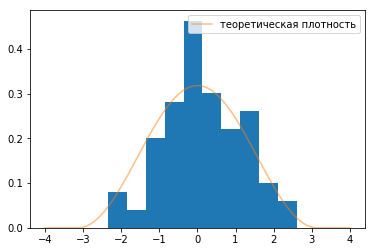

In [8]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [9]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.13566346386358633
1.0673734033785949


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [ ]:
# ваш код тут

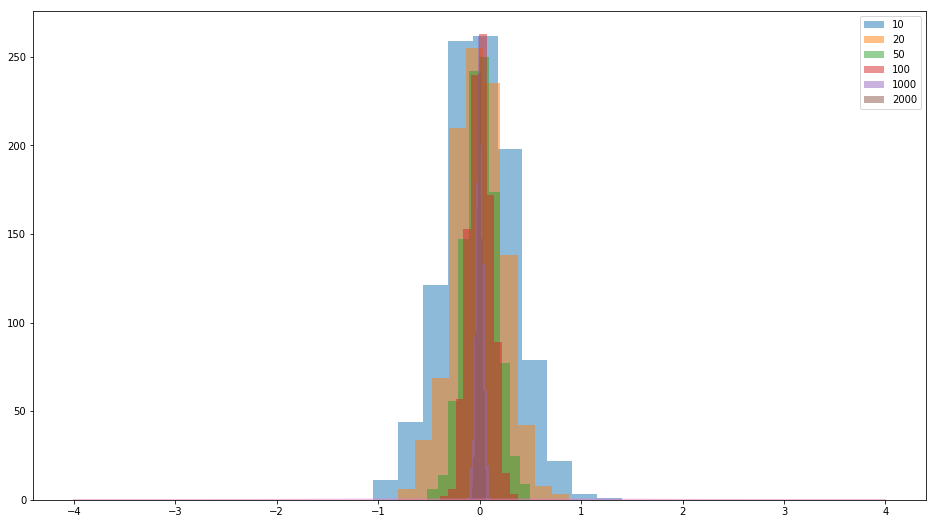

In [10]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100, 1000, 2000]:
    means = []
    for i in range(1000):
        means.append(np.mean(cosine_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '20', '50', '100', '1000','2000'])

pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.show()

#plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
#plt.legend()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
Судя по гистограмме, хорошо. Так как увеличение выборки уменьшает разброс  и приближает среднее значение.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [3]:
calls = pd.read_csv('telecom_churn.csv')

In [4]:
calls

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [33]:
calls_all=calls['total day calls']
calls_all

0       110
1       123
2       114
3        71
4       113
       ... 
3328     77
3329     57
3330    109
3331    105
3332    113
Name: total day calls, Length: 3333, dtype: int64

In [34]:
len(calls_all)

3333

In [35]:
calls_mean = calls_all.mean() #среднее
print(calls_mean)
calls_var = calls_all.var() # дисперсия
print(calls_var)
calls_std=calls_all.std(ddof=1)#стандартное отклонение
print(calls_std)

100.43564356435644
402.7681409197326
20.069084207300854


In [5]:
calls_churn = calls[calls['churn'] ==True]['total day calls']

In [6]:
calls_churn

10      137
15       67
21       89
33      118
41       85
       ... 
3301    113
3304    114
3320    101
3322    105
3323    126
Name: total day calls, Length: 483, dtype: int64

In [26]:
len(calls_churn)

483

In [10]:
calls_cmean = calls_churn.mean() #среднее
print(calls_cmean)
calls_cvar = calls_churn.var() # дисперсия
print(calls_cvar)
calls_cstd=calls_churn.std(ddof=1)#стандартное отклонение
print(calls_cstd)

101.33540372670808
465.79598463957115
21.58230721307551


In [24]:
calls_no_churn = calls[calls['churn'] ==False]['total day calls']
calls_no_churn

0       110
1       123
2       114
3        71
4       113
       ... 
3328     77
3329     57
3330    109
3331    105
3332    113
Name: total day calls, Length: 2850, dtype: int64

In [25]:
len(calls_no_churn)

2850

In [11]:
calls_nmean = calls_no_churn.mean() #среднее
print(calls_nmean)
calls_nvar = calls_no_churn.var() # дисперсия
print(calls_nvar)
calls_nstd=calls_no_churn.std(ddof=1)#стандартное отклонение
print(calls_nstd)

100.28315789473685
392.08581663003537
19.801156951805503


In [39]:
#считаем по явной формуле
Z_calls_churn= sqrt(len(calls_churn))*(calls_cmean -calls_mean )/calls_std 
print ("confidence interval calls_churn", calls_cmean -Z_calls_churn, ":",calls_cmean +Z_calls_churn )
Z_calls_no_churn= sqrt(len(calls_no_churn))*(calls_nmean -calls_mean )/calls_std 
print ("confidence interval calls_no_churn", calls_nmean + Z_calls_no_churn , ":", calls_nmean - Z_calls_no_churn )

confidence interval calls_churn 100.35009399860056 : 102.3207134548156
confidence interval calls_no_churn 99.87753364949862 : 100.68878213997507


In [30]:
from statsmodels.stats.weightstats import _zconfint_generic
from statsmodels.stats.weightstats import _tconfint_generic
from math import sqrt

In [31]:
# вычисляем z-интервал 
print("calls_churn confidence interval", _zconfint_generic(calls_cmean,sqrt(0.1/len(calls_churn)),0.05, 'two-sided'))
print("calls_no_churn confidence interval", _zconfint_generic(calls_nmean,sqrt(0.1/len(calls_no_churn)), 0.05, 'two-sided'))

calls_churn confidence interval (101.30720207623916, 101.363605377177)
calls_no_churn confidence interval (100.27154807006994, 100.29476771940375)


In [32]:
# вычисляем t- интервал
calls_churn_mean_std = calls_churn.std(ddof=1)/sqrt(len(calls_churn))
calls_no_churn_mean_std = calls_no_churn.std(ddof=1)/sqrt(len(calls_no_churn))
print("calls_churn confidence interval", _tconfint_generic(calls_cmean, calls_churn_mean_std,
                                                                       len(calls_churn) - 1,
                                                                       0.05, 'two-sided'))

print("calls_no_churn confidence interval", _tconfint_generic(calls_nmean, calls_no_churn_mean_std,
                                                                         len(calls_no_churn) - 1,
                                                                         0.05, 'two-sided'))

calls_churn confidence interval (99.4058170618902, 103.26499039152596)
calls_no_churn confidence interval (99.55587935955204, 101.01043642992165)
